In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [4]:
# turn off scientific notation 
pd.set_option('display.float_format', '{:.6f}'.format)

# Read in data

In [99]:
data_w_0 = pd.read_csv('model_data/full_model_data.csv', index_col=0)

In [100]:
data_w_0.head()

,URN,not_sustained_rate,not_sustained_rate_overalldest,total_absence,persistent_absence,urban_rural,denomination,FSM,White_British,EAL,perc_boys,region_name,school_name,headcount,perm_excl_rate,susp_rate,one_plus_susp_rate,KS4_headcount,KS2_history,Attainment_8,Progress_8,selective,KS4_pass_rate,POSTCODE,post16,school_sex,type,Ofsted_rating,sen_support,ehcp,LSOA11,IMD,pupil_teacher_ratio,assistant_teacher_ratio,absence_rate_non_excl
1,137181,5.172414,5.660377,11.100000,38.100000,(England/Wales) Urban major conurbation,No religious character,41.200000,10.800000,51.700000,56.874466,Inner London,The UCL Academy,1171.000000,0.341590,14.517510,8.454310,168,105.100000,47.400000,-0.180000,0,27,NW3 3AQ,1,Mixed,Academy sponsor led,Requires improvement,10.247652,3.245090,E01000963,8.000000,13.000000,0.200000,10.803701
2,100049,6.250000,6.748466,10.100000,33.100000,(England/Wales) Urban major conurbation,No religious character,63.500000,14.200000,57.500000,56.924644,Inner London,Haverstock School,982.000000,0.000000,7.433810,4.989820,151,102.300000,41.700000,-0.320000,0,26,NW3 2BQ,1,Mixed,Community school,Good,19.144603,2.851324,E01000902,2.000000,NaN,NaN,9.832177
3,100050,2.824859,2.906977,7.900000,24.800000,(England/Wales) Urban major conurbation,No religious character,35.600000,38.800000,34.100000,4.963971,Inner London,Parliament Hill School,1249.000000,0.080060,9.127300,5.044040,174,107.100000,59.100000,0.610000,0,40,NW5 1RL,1,Girls,Community school,Good,13.370697,1.281025,E01000912,4.000000,14.700000,0.100000,7.769210
4,100051,5.464481,5.988024,11.400000,42.900000,(England/Wales) Urban major conurbation,No religious character,61.800000,3.900000,67.300000,56.163114,Inner London,Regent High School,1079.000000,0.092680,5.375350,4.263210,173,103.500000,43.800000,-0.060000,0,21,NW1 1RX,1,Mixed,Community school,Good,17.886932,3.614458,E01000952,2.000000,11.900000,0.200000,11.246731
5,100052,1.932367,1.980198,8.200000,24.000000,(England/Wales) Urban major conurbation,No religious character,41.800000,11.400000,38.100000,51.630023,Inner London,Hampstead School,1319.000000,0.075820,3.260050,2.653530,197,103.200000,44.600000,-0.040000,0,10,NW2 3RT,1,Mixed,Community school,Good,9.628506,2.880970,E01000871,7.000000,14.900000,0.200000,8.103096


### Drop school types that are specialist or only KS4 & 5

In [101]:
data_w_0['type'] = data_w_0['type'].astype(str)
np.unique(data_w_0['type'])

array(['Academy converter', 'Academy sponsor led',
       'City technology college', 'Community school', 'Foundation school',
       'Free schools', 'Further education', 'Studio schools',
       'University technical college', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

In [102]:
types = ['Academy converter', 'Academy sponsor led',
         'Community school', 'Foundation school',
         'Free schools', 'Voluntary aided school',
         'Voluntary controlled school']

data_w_0 = data_w_0.loc[data_w_0['type'].isin(types)]

np.unique(data_w_0['type'])

array(['Academy converter', 'Academy sponsor led', 'Community school',
       'Foundation school', 'Free schools', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

### Drop null values

In [103]:
data_w_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 1 to 3146
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   URN                             3069 non-null   int64  
 1   not_sustained_rate              3069 non-null   float64
 2   not_sustained_rate_overalldest  3069 non-null   float64
 3   total_absence                   3054 non-null   float64
 4   persistent_absence              3054 non-null   float64
 5   urban_rural                     3055 non-null   object 
 6   denomination                    3055 non-null   object 
 7   FSM                             3055 non-null   float64
 8   White_British                   3055 non-null   float64
 9   EAL                             3055 non-null   float64
 10  perc_boys                       3055 non-null   float64
 11  region_name                     3055 non-null   object 
 12  school_name                     3055 no

In [104]:
data_w_0 = data_w_0.dropna(subset=['total_absence'])

In [105]:
data_w_0 = data_w_0.dropna(subset=['Progress_8'])

In [106]:
data_w_0 = data_w_0.dropna(subset=['Ofsted_rating'])

In [107]:
data_w_0 = data_w_0.dropna(subset=['pupil_teacher_ratio'])

In [108]:
data_w_0['not_sustained_rate'].describe()

count   2972.000000
mean       5.354765
std        3.670508
min        0.000000
25%        2.720164
50%        4.591837
75%        7.272727
max       28.125000
Name: not_sustained_rate, dtype: float64

In [109]:
data_w_0['not_sustained_rate_overalldest'].describe()

count   2972.000000
mean       5.907684
std        4.422501
min        0.000000
25%        2.824859
50%        4.851427
75%        7.926829
max       40.540541
Name: not_sustained_rate_overalldest, dtype: float64

In [110]:
data = data_w_0.loc[data_w_0['not_sustained_rate'] != 0]

In [111]:
data['not_sustained_rate'].describe()

count   2877.000000
mean       5.531582
std        3.597115
min        0.374532
25%        2.898551
50%        4.716981
75%        7.361963
max       28.125000
Name: not_sustained_rate, dtype: float64

In [18]:
data['not_sustained_rate_overalldest'].describe()

count   2877.000000
mean       6.102759
std        4.360466
min        0.378788
25%        3.000000
50%        5.000000
75%        8.053691
max       40.540541
Name: not_sustained_rate_overalldest, dtype: float64

# Shape of the Data

In [20]:
data['school_sex'].unique()

array(['Mixed', 'Girls', 'Boys'], dtype=object)

In [21]:
data['single_sex_binary'] = data['school_sex']

In [22]:
data['single_sex_binary'].replace('Girls', 1, inplace=True)
data['single_sex_binary'].replace('Boys', 1, inplace=True)
data['single_sex_binary'].replace('Mixed', 0, inplace=True)

In [23]:
data['Ofsted_rating'] = data['Ofsted_rating'].astype(str)
np.unique(data['Ofsted_rating'])

array(['Good', 'Outstanding', 'Requires improvement',
       'Serious Weaknesses', 'Special Measures'], dtype=object)

In [24]:
data['Ofsted_rating'].replace('Serious Weaknesses', 'Inadequate', inplace=True)
data['Ofsted_rating'].replace('Special Measures', 'Inadequate', inplace=True)

In [25]:
# convert to category type
from pandas.api.types import CategoricalDtype

ofsted_cats = CategoricalDtype(categories=['Outstanding', 'Good', 'Requires improvement', 'Inadequate'], ordered=True)
data['Ofsted_rating'] = data['Ofsted_rating'].astype(ofsted_cats)

In [26]:
data.groupby('Ofsted_rating').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_63173/3787143538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Ofsted_rating').size()


Ofsted_rating
Outstanding              416
Good                    2022
Requires improvement     370
Inadequate                69
dtype: int64

In [27]:
data['denomination'].replace('Church of England', 'Christian', inplace=True)
data['denomination'].replace('Hindu', 'Other faith', inplace=True)
data['denomination'].replace('Jewish', 'Other faith', inplace=True)
data['denomination'].replace('Multi-faith', 'No faith', inplace=True)
data['denomination'].replace('Muslim', 'Other faith', inplace=True)
data['denomination'].replace('No religious character', 'No faith', inplace=True)
data['denomination'].replace('Other Anglican Faith', 'Christian', inplace=True)
data['denomination'].replace('Other Christian Faith', 'Christian', inplace=True)
data['denomination'].replace('Roman Catholic', 'Christian', inplace=True)
data['denomination'].replace('Sikh', 'Other faith', inplace=True)

In [28]:
data.groupby('denomination').size()

denomination
Christian       497
No faith       2356
Other faith      24
dtype: int64

In [29]:
data['faith_binary'] = data['denomination']

In [30]:
data['faith_binary'].replace('No faith', 0, inplace=True)
data['faith_binary'].replace('Christian', 1, inplace=True)
data['faith_binary'].replace('Other faith', 1, inplace=True)

In [31]:
data.groupby('faith_binary').size()

faith_binary
0    2356
1     521
dtype: int64

In [32]:
# new column for region
data['region_new'] = data['region_name']

data['region_new'].replace('Outer London', 'London', inplace=True)
data['region_new'].replace('Inner London', 'London', inplace=True)

data['region_new'].replace('South East', 'South', inplace=True)
data['region_new'].replace('South West', 'South', inplace=True)
data['region_new'].replace('East of England', 'South', inplace=True)

data['region_new'].replace('East Midlands', 'Midlands', inplace=True)
data['region_new'].replace('West Midlands', 'Midlands', inplace=True)

data['region_new'].replace('Yorkshire and The Humber', 'North', inplace=True)
data['region_new'].replace('North West', 'North', inplace=True)
data['region_new'].replace('North East', 'North', inplace=True)

In [33]:
data.groupby('region_new').size()

region_new
London       429
Midlands     589
North        811
South       1048
dtype: int64

In [34]:
data['urban_rural'] = data['urban_rural'].astype(str)
np.unique(data['urban_rural'])

array(['(England/Wales) Rural hamlet and isolated dwellings',
       '(England/Wales) Rural hamlet and isolated dwellings in a sparse setting',
       '(England/Wales) Rural town and fringe',
       '(England/Wales) Rural town and fringe in a sparse setting',
       '(England/Wales) Rural village',
       '(England/Wales) Rural village in a sparse setting',
       '(England/Wales) Urban city and town',
       '(England/Wales) Urban city and town in a sparse setting',
       '(England/Wales) Urban major conurbation',
       '(England/Wales) Urban minor conurbation'], dtype=object)

In [35]:
data['urban_rural'].replace('(England/Wales) Urban major conurbation', 'Urban major conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban minor conurbation', 'Urban minor conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town', 'Urban city and town', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town in a sparse setting', 'Urban city and town in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe', 'Rural town and fringe', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe in a sparse setting', 'Rural town and fringe in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village', 'Rural village', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village in a sparse setting', 'Rural village in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings', 'Rural hamlet and isolated dwellings', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings in a sparse setting', 'Rural hamlet and isolated dwellings in a sparse setting', inplace=True)

In [36]:
urban_rural_cats = CategoricalDtype(categories=['Urban major conurbation', 
                                                'Urban minor conurbation', 
                                                'Urban city and town', 
                                                'Urban city and town in a sparse setting', 
                                                'Rural town and fringe',
                                                'Rural town and fringe in a sparse setting',
                                                'Rural village',
                                                'Rural village in a sparse setting',
                                                'Rural hamlet and isolated dwellings',
                                                'Rural hamlet and isolated dwellings in a sparse setting'
                                               ], 
                                    ordered=True)
data['urban_rural'] = data['urban_rural'].astype(urban_rural_cats)

In [37]:
data.groupby('urban_rural').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_63173/1274345496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_rural').size()


urban_rural
Urban major conurbation                                    1014
Urban minor conurbation                                     105
Urban city and town                                        1338
Urban city and town in a sparse setting                       7
Rural town and fringe                                       284
Rural town and fringe in a sparse setting                    25
Rural village                                                53
Rural village in a sparse setting                             6
Rural hamlet and isolated dwellings                          42
Rural hamlet and isolated dwellings in a sparse setting       3
dtype: int64

In [38]:
# new column for binary urban status
data['urban_binary'] = data['urban_rural']

In [39]:
# replace labels with numbers
data['urban_binary'].replace('Urban major conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban minor conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban city and town', 1, inplace=True)
data['urban_binary'].replace('Urban city and town in a sparse setting', 1, inplace=True)
data['urban_binary'].replace('Rural town and fringe', 0, inplace=True)
data['urban_binary'].replace('Rural town and fringe in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural village', 0, inplace=True)
data['urban_binary'].replace('Rural village in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings in a sparse setting', 0, inplace=True)

In [40]:
data.groupby('urban_binary').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_63173/419234468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_binary').size()


urban_binary
1    2464
0     413
dtype: int64

# Correlations

In [41]:
from copy import copy
from scipy.stats import kendalltau

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 1 to 3146
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2877 non-null   int64   
 1   not_sustained_rate              2877 non-null   float64 
 2   not_sustained_rate_overalldest  2877 non-null   float64 
 3   total_absence                   2877 non-null   float64 
 4   persistent_absence              2877 non-null   float64 
 5   urban_rural                     2877 non-null   category
 6   denomination                    2877 non-null   object  
 7   FSM                             2877 non-null   float64 
 8   White_British                   2877 non-null   float64 
 9   EAL                             2877 non-null   float64 
 10  perc_boys                       2877 non-null   float64 
 11  region_name                     2877 non-null   object  
 12  school_name              

In [43]:
data['Ofsted_num'] = data['Ofsted_rating']
data['Ofsted_num'].replace('Outstanding', 4, inplace=True)
data['Ofsted_num'].replace('Good', 3, inplace=True)
data['Ofsted_num'].replace('Requires improvement', 2, inplace=True)
data['Ofsted_num'].replace('Inadequate', 1, inplace=True)

In [44]:
# convert to category 
data['denomination'] = pd.Categorical(data['denomination'])
data['school_sex'] = pd.Categorical(data['school_sex'])
data['type'] = pd.Categorical(data['type'])
data['region_new'] = pd.Categorical(data['region_new'])

# convert to int
data['urban_binary'] = data['urban_binary'].astype(int)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 1 to 3146
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2877 non-null   int64   
 1   not_sustained_rate              2877 non-null   float64 
 2   not_sustained_rate_overalldest  2877 non-null   float64 
 3   total_absence                   2877 non-null   float64 
 4   persistent_absence              2877 non-null   float64 
 5   urban_rural                     2877 non-null   category
 6   denomination                    2877 non-null   category
 7   FSM                             2877 non-null   float64 
 8   White_British                   2877 non-null   float64 
 9   EAL                             2877 non-null   float64 
 10  perc_boys                       2877 non-null   float64 
 11  region_name                     2877 non-null   object  
 12  school_name              

In [46]:
vars_for_corr = data[['not_sustained_rate', 'not_sustained_rate_overalldest',
                      'absence_rate_non_excl', 'persistent_absence', 
                      'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                      'FSM', 'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 
                      'headcount', 'KS4_headcount', 
                      'pupil_teacher_ratio', 'assistant_teacher_ratio', 
                      'Ofsted_num',
                      'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8', 
                      'selective', 'post16',
                      'IMD', 'urban_binary', 'single_sex_binary', 'faith_binary']]

In [47]:
vars_for_corr.columns

Index(['not_sustained_rate', 'not_sustained_rate_overalldest',
       'absence_rate_non_excl', 'persistent_absence', 'perm_excl_rate',
       'susp_rate', 'one_plus_susp_rate', 'FSM', 'White_British', 'EAL',
       'perc_boys', 'sen_support', 'ehcp', 'headcount', 'KS4_headcount',
       'pupil_teacher_ratio', 'assistant_teacher_ratio', 'Ofsted_num',
       'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8',
       'selective', 'post16', 'IMD', 'urban_binary', 'single_sex_binary',
       'faith_binary'],
      dtype='object')

In [48]:
corr_names = {
    'not_sustained_rate': 'Not sustained %',
    'not_sustained_rate_overalldest' : 'Not sustained % of known destinations',
    'absence_rate_non_excl': 'Absence %', 
    'persistent_absence': 'Persistent absence %',
    'perm_excl_rate': 'Permanent exclusion %', 
    'susp_rate': 'Suspension %', 
    'one_plus_susp_rate': 'One-plus suspension %', 
    'FSM': 'FSM %',
    'White_British': 'White British %', 
    'EAL': 'EAL %', 
    'perc_boys': 'Boys %', 
    'sen_support': 'SEN support %', 
    'ehcp': 'EHCP %', 
    'headcount': 'School headcount',
    'KS4_headcount': 'KS4 headcount', 
    'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    'Ofsted_num': 'Ofsted rating',
    'KS2_history': 'KS2 history', 
    'KS4_pass_rate': 'KS4 pass %', 
    'Attainment_8': 'A8', 
    'Progress_8': 'P8',
    'selective': 'Selective schools', 
    'post16': 'Post-16', 
    'IMD': 'IMD of LSOA', 
    'urban_binary': 'Urban schools', 
    'single_sex_binary': 'Single sex schools',
    'faith_binary': 'Faith schools'
}

In [49]:
vars_for_corr = vars_for_corr.rename(columns=corr_names)

In [50]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

##### Positive correlations

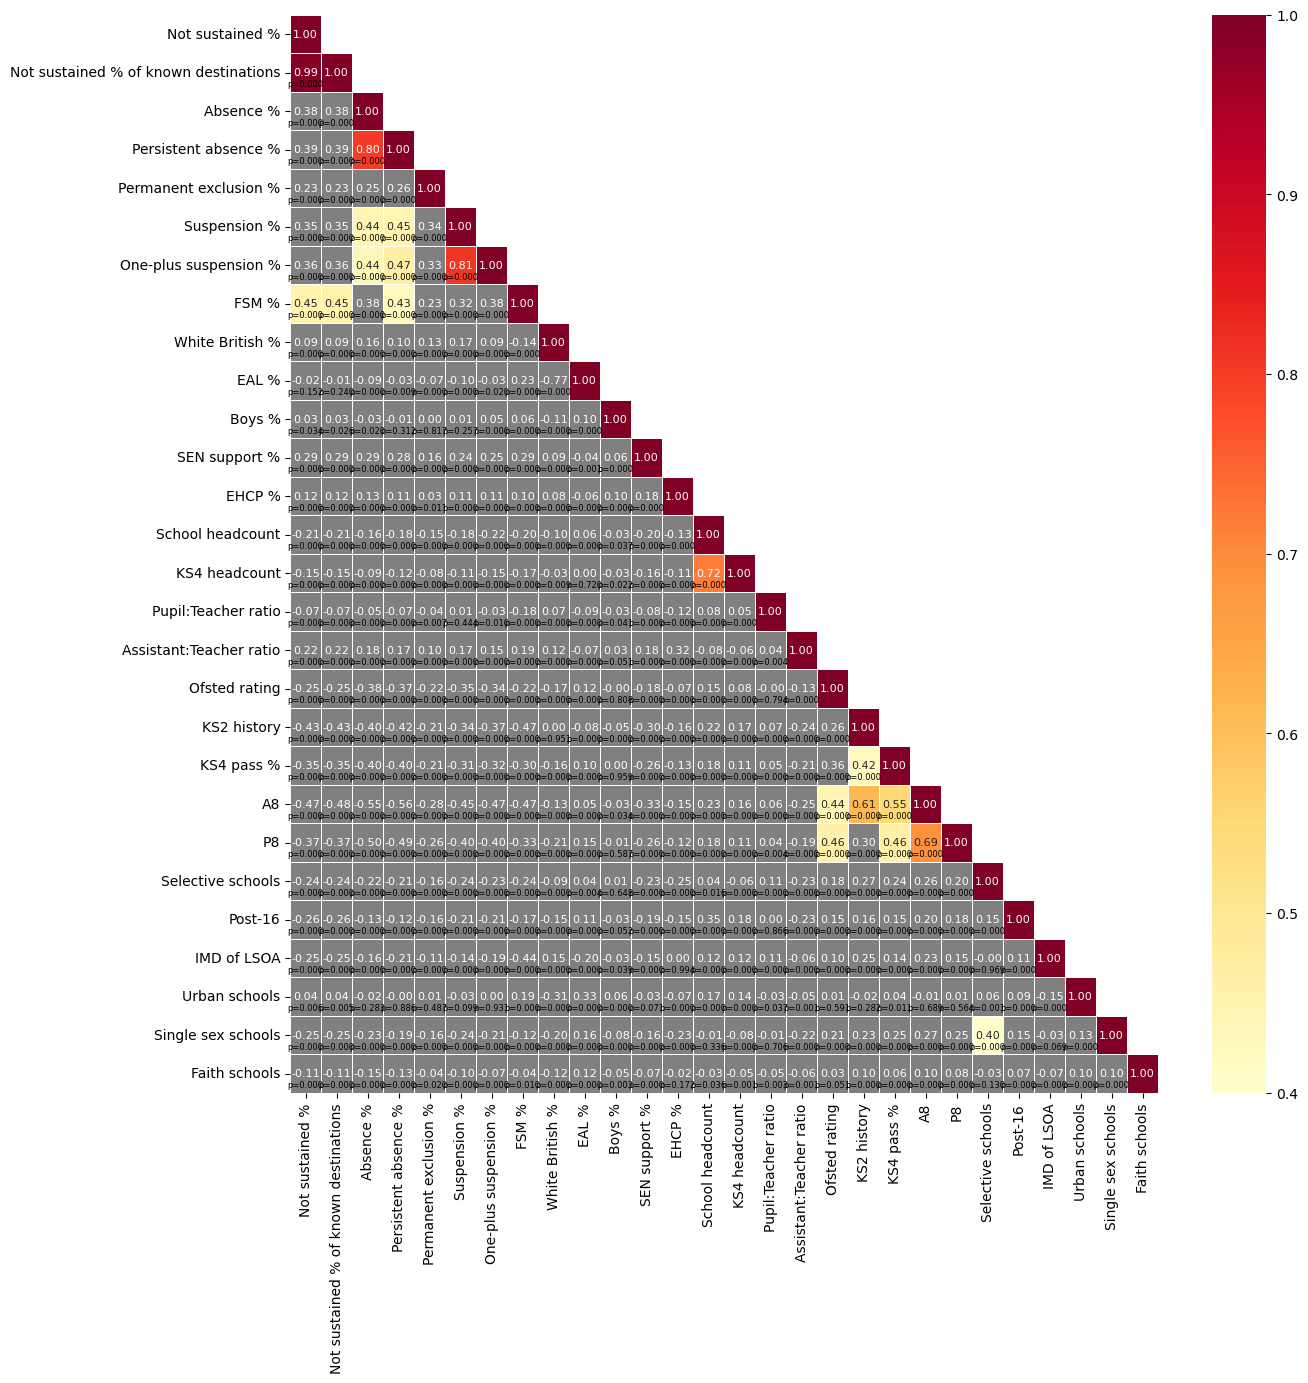

In [51]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


## Negative correlations

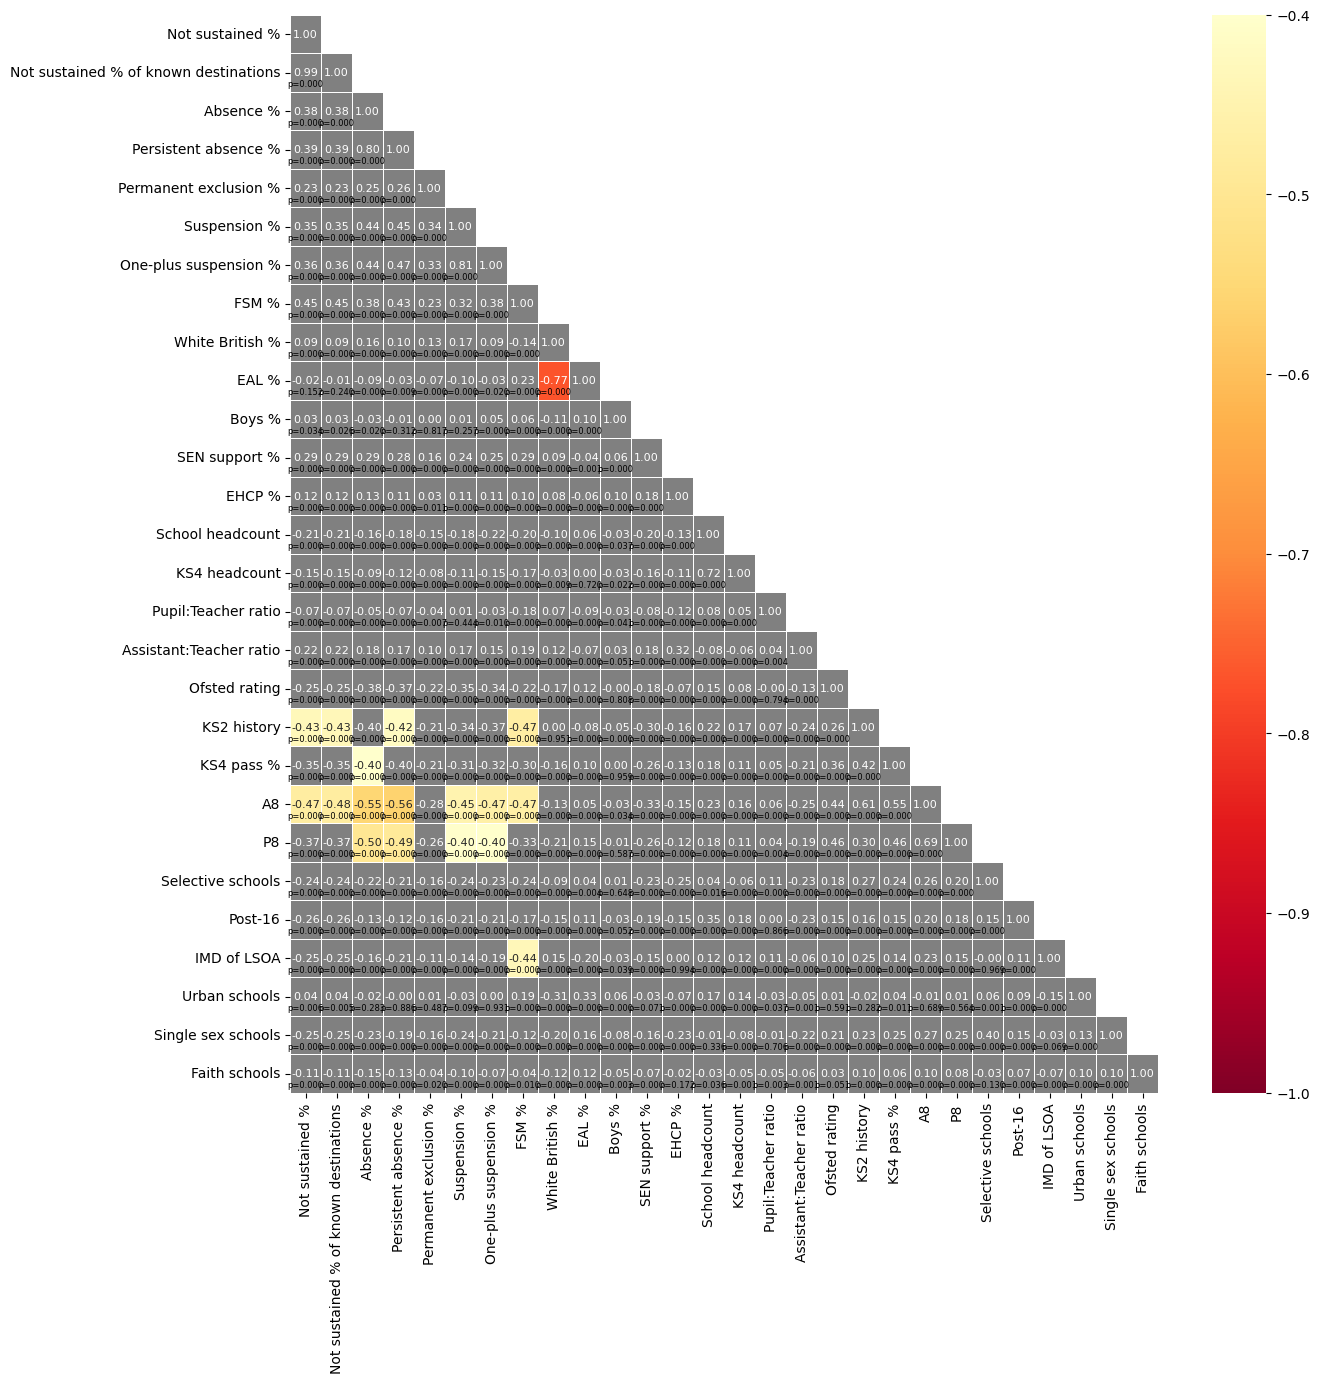

In [52]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

# Regression Models

In [53]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [54]:
ord_transformer = OrdinalEncoder()

In [55]:
data[['Ofsted_rating']] = ord_transformer.fit_transform(data[['Ofsted_rating']])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 1 to 3146
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2877 non-null   int64   
 1   not_sustained_rate              2877 non-null   float64 
 2   not_sustained_rate_overalldest  2877 non-null   float64 
 3   total_absence                   2877 non-null   float64 
 4   persistent_absence              2877 non-null   float64 
 5   urban_rural                     2877 non-null   category
 6   denomination                    2877 non-null   category
 7   FSM                             2877 non-null   float64 
 8   White_British                   2877 non-null   float64 
 9   EAL                             2877 non-null   float64 
 10  perc_boys                       2877 non-null   float64 
 11  region_name                     2877 non-null   object  
 12  school_name              

### Specify variables

In [57]:
predictors = data[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
]]

In [58]:
controls = data[[
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

In [59]:
predictors_controls = data[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',

# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

# Model 1 - OLS 

### individual effects

In [60]:
# extract R-squared for each predictor model
individual_r2 = {}

for p in predictors_controls:
    x = data[p]
    y = data['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    individual_r2[p] = model.rsquared
    

In [61]:
# round to 3 dec
individual_r2 = {predictor: round(r2, 3) for predictor, r2 in individual_r2.items()}
individual_r2

{'headcount': 0.543,
 'pupil_teacher_ratio': 0.683,
 'assistant_teacher_ratio': 0.656,
 'susp_rate': 0.535,
 'Progress_8': 0.098,
 'post16': 0.306,
 'Ofsted_rating': 0.195,
 'faith_binary': 0.091,
 'single_sex_binary': 0.016,
 'Attainment_8': 0.586,
 'absence_rate_non_excl': 0.781,
 'selective': 0.001,
 'perc_boys': 0.665,
 'FSM': 0.806,
 'sen_support': 0.746,
 'White_British': 0.628,
 'KS2_history': 0.691,
 'IMD': 0.44,
 'urban_binary': 0.622}

### predictors

In [62]:
x = sm.add_constant(predictors)

In [63]:
y = data['not_sustained_rate']

In [64]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     not_sustained_rate   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     205.1
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          1.35e-301
Time:                        14:34:04   Log-Likelihood:                -7049.7
No. Observations:                2877   AIC:                         1.412e+04
Df Residuals:                    2867   BIC:                         1.418e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       8.4288      0.430     19.601      0.000       7.586       9.272
headcount                  -0.0012      0.000     -7.748      0.000      -0.002      -0.001
pupil_teacher_ratio        -0.1331      0.023     -5.726      0.000      -0.179      -0.088
assistant_teacher_ratio     2.6208      0.467      5.614      0.000       1.705       3.536
susp_rate                   0.0372      0.002     15.271      0.000       0.032       0.042
Progress_8                 -2.0997      0.129    -16.317      0.000      -2.352      -1.847
post16                     -0.7980      0.123     -6.478      0.000      -1.040      -0.556
Ofsted_rating              -0.0627      0.047     -1.333      0.183      -0.155       0.030
faith_binary               -0.4715      0.138     -3.410      0.001      -0.743      -0.200
single_sex_binary          -1.0414      0.194     -5.381      0.000      -1.421      -0.662
==============================================================================
Omnibus:                      435.540   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              853.207
Skew:                           0.927   Prob(JB):                    5.35e-186
Kurtosis:                       4.918   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### predictors - overall dest

In [65]:
x = sm.add_constant(predictors)

In [66]:
y = data['not_sustained_rate_overalldest']

In [67]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     not_sustained_rate_overalldest   R-squared:                       0.379
Model:                                        OLS   Adj. R-squared:                  0.377
Method:                             Least Squares   F-statistic:                     194.4
Date:                            Fri, 28 Feb 2025   Prob (F-statistic):          7.82e-289
Time:                                    14:34:08   Log-Likelihood:                -7633.0
No. Observations:                            2877   AIC:                         1.529e+04
Df Residuals:                                2867   BIC:                         1.535e+04
Df Model:                                       9                                         
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       9.5136      0.527     18.063      0.000       8.481      10.546
headcount                  -0.0015      0.000     -7.581      0.000      -0.002      -0.001
pupil_teacher_ratio        -0.1595      0.028     -5.602      0.000      -0.215      -0.104
assistant_teacher_ratio     3.0232      0.572      5.288      0.000       1.902       4.144
susp_rate                   0.0466      0.003     15.624      0.000       0.041       0.052
Progress_8                 -2.4778      0.158    -15.722      0.000      -2.787      -2.169
post16                     -0.9257      0.151     -6.136      0.000      -1.222      -0.630
Ofsted_rating              -0.0663      0.058     -1.150      0.250      -0.179       0.047
faith_binary               -0.5377      0.169     -3.175      0.002      -0.870      -0.206
single_sex_binary          -1.0786      0.237     -4.551      0.000      -1.543      -0.614
==============================================================================
Omnibus:                      725.819   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2316.129
Skew:                           1.264   Prob(JB):                         0.00
Kurtosis:                       6.596   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### predictors and controls

In [68]:
x = sm.add_constant(predictors_controls)

In [69]:
y = data['not_sustained_rate']

In [70]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     not_sustained_rate   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     181.4
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:34:11   Log-Likelihood:                -6626.2
No. Observations:                2877   AIC:                         1.329e+04
Df Residuals:                    2857   BIC:                         1.341e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      81.0576     10.401      7.793      0.000      60.662     101.453
headcount                  -0.0004      0.000     -2.734      0.006      -0.001      -0.000
pupil_teacher_ratio        -0.0170      0.021     -0.824      0.410      -0.058       0.024
assistant_teacher_ratio     0.1403      0.418      0.336      0.737      -0.679       0.960
susp_rate                   0.0150      0.002      6.509      0.000       0.010       0.019
Progress_8                 -3.5168      0.638     -5.514      0.000      -4.767      -2.266
post16                     -0.7297      0.108     -6.744      0.000      -0.942      -0.518
Ofsted_rating              -0.0300      0.041     -0.733      0.464      -0.110       0.050
faith_binary               -0.2278      0.124     -1.831      0.067      -0.472       0.016
single_sex_binary          -0.4928      0.186     -2.652      0.008      -0.857      -0.128
Attainment_8                0.3063      0.062      4.959      0.000       0.185       0.427
absence_rate_non_excl       0.1023      0.033      3.140      0.002       0.038       0.166
selective                   1.0214      0.375      2.724      0.006       0.286       1.757
perc_boys                   0.0064      0.003      2.097      0.036       0.000       0.012
FSM                         0.0975      0.007     14.800      0.000       0.085       0.110
sen_support                 0.0258      0.010      2.491      0.013       0.005       0.046
White_British               0.0213      0.002      9.751      0.000       0.017       0.026
KS2_history                -0.9055      0.126     -7.194      0.000      -1.152      -0.659
IMD                        -0.0728      0.021     -3.518      0.000      -0.113      -0.032
urban_binary                0.5405      0.145      3.730      0.000       0.256       0.825
==============================================================================
Omnibus:                      390.187   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              911.517
Skew:                           0.783   Prob(JB):                    1.17e-198
Kurtosis:                       5.270   Cond. No.                     2.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

,predictor,VIF
7,Ofsted_rating,1.035403
2,pupil_teacher_ratio,1.090792
13,perc_boys,1.092695
8,faith_binary,1.119220
3,assistant_teacher_ratio,1.217399
19,urban_binary,1.258340
6,post16,1.347834
9,single_sex_binary,1.469309
15,sen_support,1.510259
4,susp_rate,1.563586


### predictors and controls - drop high VIF

In [72]:
predictors_controls_low_vif = predictors_controls.drop(columns=[ 'Attainment_8']).copy()

In [73]:
x = sm.add_constant(predictors_controls_low_vif)

In [74]:
y = data['not_sustained_rate']

In [75]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     not_sustained_rate   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     188.6
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:34:21   Log-Likelihood:                -6638.5
No. Observations:                2877   AIC:                         1.332e+04
Df Residuals:                    2858   BIC:                         1.343e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      32.5182      3.534      9.202      0.000      25.589      39.447
headcount                  -0.0004      0.000     -2.741      0.006      -0.001      -0.000
pupil_teacher_ratio        -0.0225      0.021     -1.086      0.278      -0.063       0.018
assistant_teacher_ratio     0.2150      0.420      0.512      0.608      -0.608       1.038
susp_rate                   0.0155      0.002      6.714      0.000       0.011       0.020
Progress_8                 -0.4330      0.142     -3.042      0.002      -0.712      -0.154
post16                     -0.7331      0.109     -6.747      0.000      -0.946      -0.520
Ofsted_rating              -0.0292      0.041     -0.712      0.476      -0.110       0.051
faith_binary               -0.2188      0.125     -1.751      0.080      -0.464       0.026
single_sex_binary          -0.5439      0.186     -2.919      0.004      -0.909      -0.179
absence_rate_non_excl       0.0949      0.033      2.902      0.004       0.031       0.159
selective                   1.7248      0.349      4.948      0.000       1.041       2.408
perc_boys                   0.0066      0.003      2.136      0.033       0.001       0.013
FSM                         0.1002      0.007     15.203      0.000       0.087       0.113
sen_support                 0.0271      0.010      2.615      0.009       0.007       0.047
White_British               0.0209      0.002      9.563      0.000       0.017       0.025
KS2_history                -0.3022      0.032     -9.316      0.000      -0.366      -0.239
IMD                        -0.0664      0.021     -3.201      0.001      -0.107      -0.026
urban_binary                0.5542      0.145      3.810      0.000       0.269       0.840
==============================================================================
Omnibus:                      405.523   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              969.190
Skew:                           0.803   Prob(JB):                    3.49e-211
Kurtosis:                       5.347   Cond. No.                     9.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

,predictor,VIF
7,Ofsted_rating,1.035390
2,pupil_teacher_ratio,1.087673
12,perc_boys,1.092593
8,faith_binary,1.118978
3,assistant_teacher_ratio,1.215819
18,urban_binary,1.257878
6,post16,1.347781
9,single_sex_binary,1.464807
14,sen_support,1.509155
4,susp_rate,1.560348


In [77]:
model.aic

13315.008551818963

### predictors and controls - overall dest

In [78]:
x = sm.add_constant(predictors_controls)

In [79]:
y = data['not_sustained_rate_overalldest']

In [80]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     not_sustained_rate_overalldest   R-squared:                       0.531
Model:                                        OLS   Adj. R-squared:                  0.527
Method:                             Least Squares   F-statistic:                     170.0
Date:                            Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                    14:34:30   Log-Likelihood:                -7230.4
No. Observations:                            2877   AIC:                         1.450e+04
Df Residuals:                                2857   BIC:                         1.462e+04
Df Model:                                      19                                         
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     107.6563     12.833      8.389      0.000      82.494     132.818
headcount                  -0.0005      0.000     -2.599      0.009      -0.001      -0.000
pupil_teacher_ratio        -0.0205      0.026     -0.802      0.423      -0.071       0.030
assistant_teacher_ratio     0.0979      0.516      0.190      0.849      -0.913       1.109
susp_rate                   0.0200      0.003      7.064      0.000       0.014       0.026
Progress_8                 -4.9604      0.787     -6.304      0.000      -6.503      -3.418
post16                     -0.8600      0.134     -6.442      0.000      -1.122      -0.598
Ofsted_rating              -0.0303      0.050     -0.601      0.548      -0.129       0.069
faith_binary               -0.2359      0.154     -1.537      0.124      -0.537       0.065
single_sex_binary          -0.5000      0.229     -2.181      0.029      -0.950      -0.050
Attainment_8                0.4412      0.076      5.789      0.000       0.292       0.591
absence_rate_non_excl       0.1275      0.040      3.172      0.002       0.049       0.206
selective                   1.3441      0.463      2.905      0.004       0.437       2.251
perc_boys                   0.0068      0.004      1.802      0.072      -0.001       0.014
FSM                         0.1163      0.008     14.321      0.000       0.100       0.132
sen_support                 0.0335      0.013      2.627      0.009       0.009       0.059
White_British               0.0237      0.003      8.812      0.000       0.018       0.029
KS2_history                -1.2242      0.155     -7.884      0.000      -1.529      -0.920
IMD                        -0.0814      0.026     -3.187      0.001      -0.131      -0.031
urban_binary                0.6079      0.179      3.400      0.001       0.257       0.958
==============================================================================
Omnibus:                      717.733   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2935.678
Skew:                           1.164   Prob(JB):                         0.00
Kurtosis:                       7.367   Cond. No.                     2.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

,predictor,VIF
7,Ofsted_rating,1.035403
2,pupil_teacher_ratio,1.090792
13,perc_boys,1.092695
8,faith_binary,1.119220
3,assistant_teacher_ratio,1.217399
19,urban_binary,1.258340
6,post16,1.347834
9,single_sex_binary,1.469309
15,sen_support,1.510259
4,susp_rate,1.563586


### predictors and controls - overall dest - drop high VIF

In [82]:
predictors_controls_low_vif = predictors_controls.drop(columns=['Attainment_8']).copy()

In [83]:
x = sm.add_constant(predictors_controls_low_vif)

In [84]:
y = data['not_sustained_rate_overalldest']

In [85]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     not_sustained_rate_overalldest   R-squared:                       0.525
Model:                                        OLS   Adj. R-squared:                  0.522
Method:                             Least Squares   F-statistic:                     175.6
Date:                            Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                    14:34:38   Log-Likelihood:                -7247.2
No. Observations:                            2877   AIC:                         1.453e+04
Df Residuals:                                2858   BIC:                         1.465e+04
Df Model:                                      18                                         
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      37.7478      4.366      8.645      0.000      29.186      46.309
headcount                  -0.0005      0.000     -2.606      0.009      -0.001      -0.000
pupil_teacher_ratio        -0.0284      0.026     -1.107      0.268      -0.079       0.022
assistant_teacher_ratio     0.2055      0.518      0.396      0.692      -0.811       1.222
susp_rate                   0.0208      0.003      7.294      0.000       0.015       0.026
Progress_8                 -0.5191      0.176     -2.951      0.003      -0.864      -0.174
post16                     -0.8648      0.134     -6.441      0.000      -1.128      -0.602
Ofsted_rating              -0.0293      0.051     -0.577      0.564      -0.129       0.070
faith_binary               -0.2229      0.154     -1.444      0.149      -0.526       0.080
single_sex_binary          -0.5735      0.230     -2.491      0.013      -1.025      -0.122
absence_rate_non_excl       0.1168      0.040      2.891      0.004       0.038       0.196
selective                   2.3571      0.431      5.472      0.000       1.513       3.202
perc_boys                   0.0070      0.004      1.847      0.065      -0.000       0.014
FSM                         0.1203      0.008     14.770      0.000       0.104       0.136
sen_support                 0.0355      0.013      2.769      0.006       0.010       0.061
White_British               0.0232      0.003      8.589      0.000       0.018       0.029
KS2_history                -0.3553      0.040     -8.864      0.000      -0.434      -0.277
IMD                        -0.0721      0.026     -2.814      0.005      -0.122      -0.022
urban_binary                0.6277      0.180      3.492      0.000       0.275       0.980
==============================================================================
Omnibus:                      748.729   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3191.814
Skew:                           1.203   Prob(JB):                         0.00
Kurtosis:                       7.565   Cond. No.                     9.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

,predictor,VIF
7,Ofsted_rating,1.035390
2,pupil_teacher_ratio,1.087673
12,perc_boys,1.092593
8,faith_binary,1.118978
3,assistant_teacher_ratio,1.215819
18,urban_binary,1.257878
6,post16,1.347781
9,single_sex_binary,1.464807
14,sen_support,1.509155
4,susp_rate,1.560348


In [87]:
model.aic

14532.450914985999

## Visualisations

#### Residuals

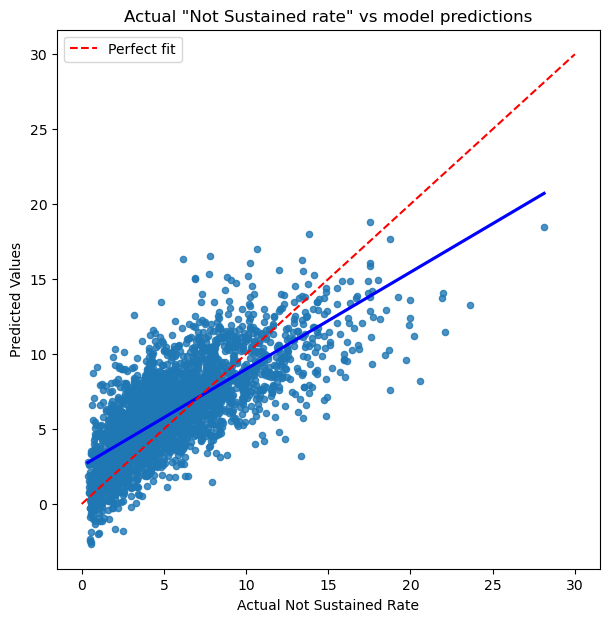

In [88]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

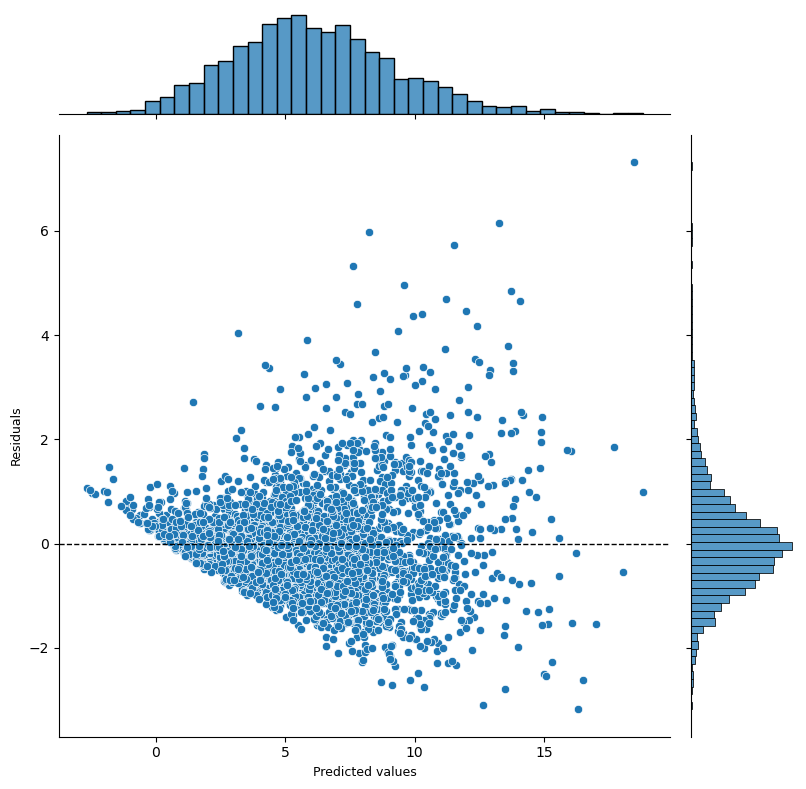

In [89]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

#### Correlation matrix

In [90]:
vars = x.columns.tolist()
vars = vars[1:]
vars

['headcount',
 'pupil_teacher_ratio',
 'assistant_teacher_ratio',
 'susp_rate',
 'Progress_8',
 'post16',
 'Ofsted_rating',
 'faith_binary',
 'single_sex_binary',
 'absence_rate_non_excl',
 'selective',
 'perc_boys',
 'FSM',
 'sen_support',
 'White_British',
 'KS2_history',
 'IMD',
 'urban_binary']

In [91]:
vars_for_corr = data[vars]


In [92]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

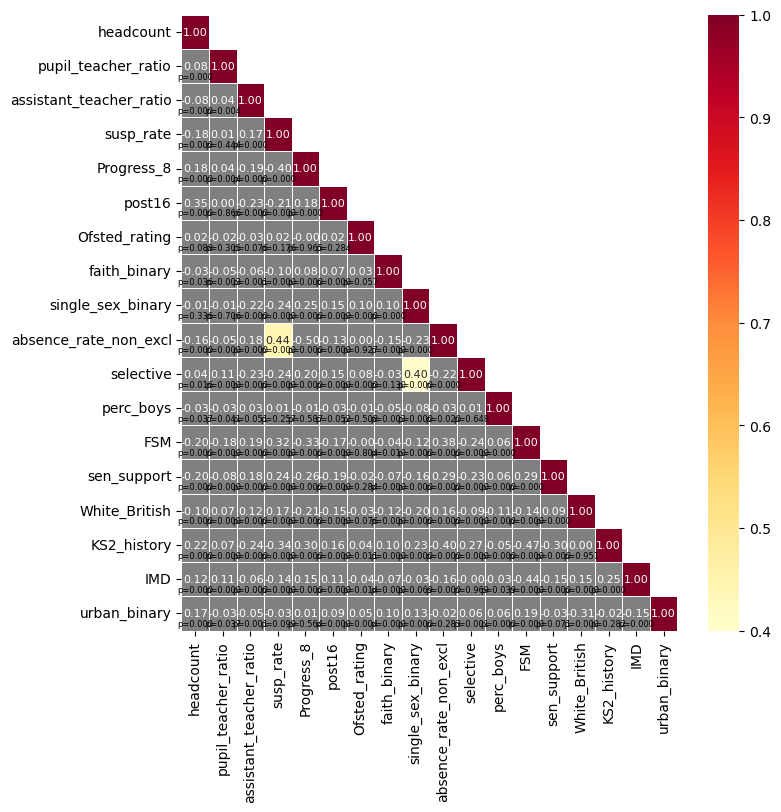

In [93]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


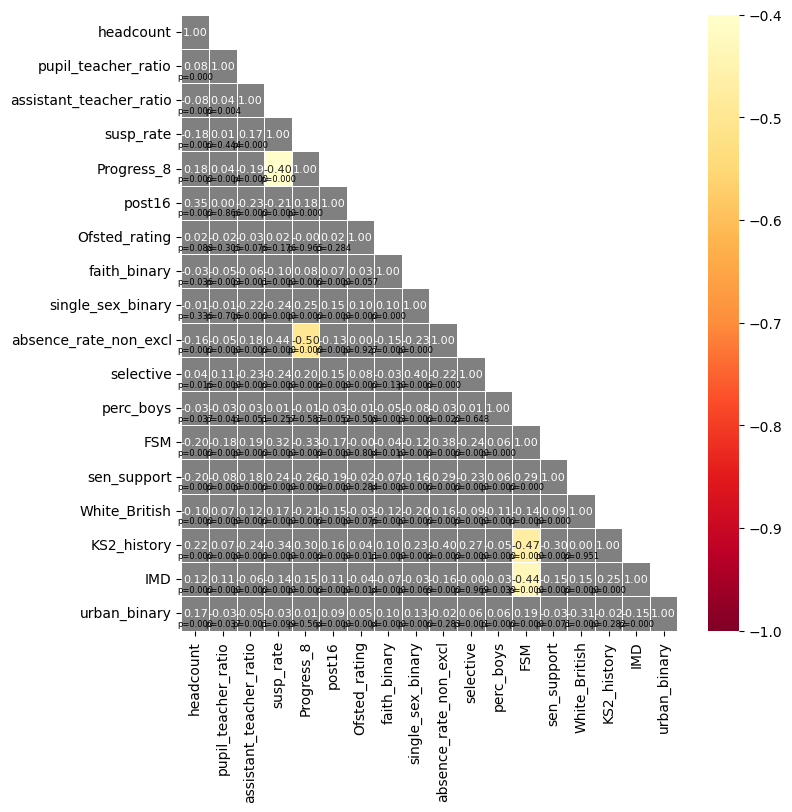

In [94]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

#### Coefficient plot

In [95]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()
sig = model.pvalues

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1],
    'p-value': sig
}).reset_index().rename(columns={'index': 'Predictor'})

coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
#coef_df['Predictor'] = coef_df['Predictor'].map(corr_names)
coef_df

,Predictor,Coefficient,Lower CI,Upper CI,p-value
6,post16,-0.864779,-1.128030,-0.601528,0.000000
9,single_sex_binary,-0.573465,-1.024869,-0.122061,0.012795
5,Progress_8,-0.519071,-0.863979,-0.174163,0.003194
16,KS2_history,-0.355339,-0.433942,-0.276736,0.000000
8,faith_binary,-0.222854,-0.525549,0.079841,0.148961
17,IMD,-0.072130,-0.122390,-0.021870,0.004926
7,Ofsted_rating,-0.029287,-0.128736,0.070162,0.563692
2,pupil_teacher_ratio,-0.028376,-0.078633,0.021882,0.268361
1,headcount,-0.000475,-0.000833,-0.000118,0.009203
12,perc_boys,0.007009,-0.000430,0.014449,0.064796


In [96]:
coef_df_sig = coef_df.loc[coef_df['p-value'] <0.05].copy()
coef_df_sig

,Predictor,Coefficient,Lower CI,Upper CI,p-value
6,post16,-0.864779,-1.128030,-0.601528,0.000000
9,single_sex_binary,-0.573465,-1.024869,-0.122061,0.012795
5,Progress_8,-0.519071,-0.863979,-0.174163,0.003194
16,KS2_history,-0.355339,-0.433942,-0.276736,0.000000
17,IMD,-0.072130,-0.122390,-0.021870,0.004926
1,headcount,-0.000475,-0.000833,-0.000118,0.009203
4,susp_rate,0.020774,0.015189,0.026358,0.000000
15,White_British,0.023233,0.017929,0.028538,0.000000
14,sen_support,0.035514,0.010367,0.060661,0.005657
10,absence_rate_non_excl,0.116785,0.037581,0.195988,0.003867


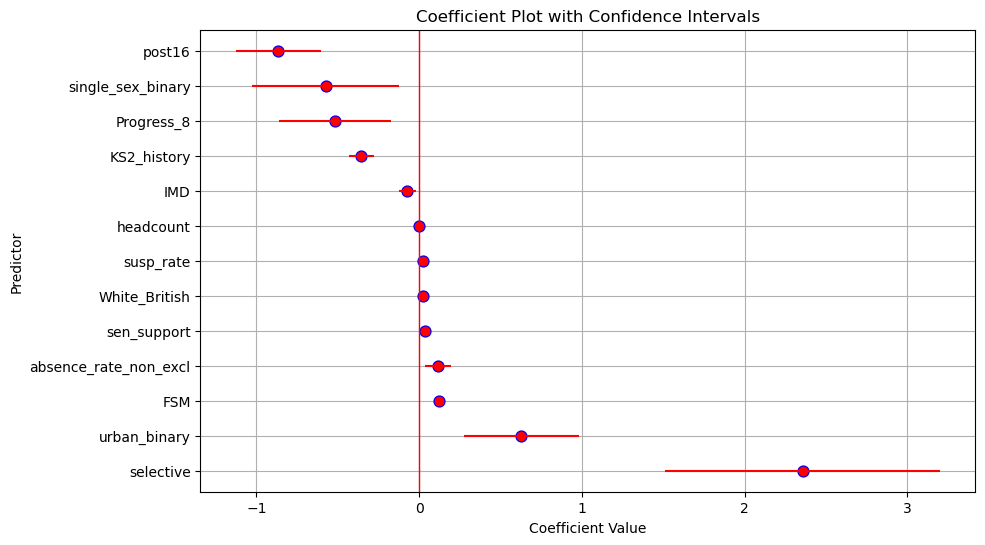

In [97]:
# rename labels using dictionary
#coef_df_sig['Predictor'] = coef_df_sig['Predictor'].map(corr_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df_sig, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df_sig['Coefficient'], coef_df_sig['Predictor'], 
             xerr=[coef_df_sig['Coefficient'] - coef_df_sig['Lower CI'], coef_df_sig['Upper CI'] - coef_df_sig['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

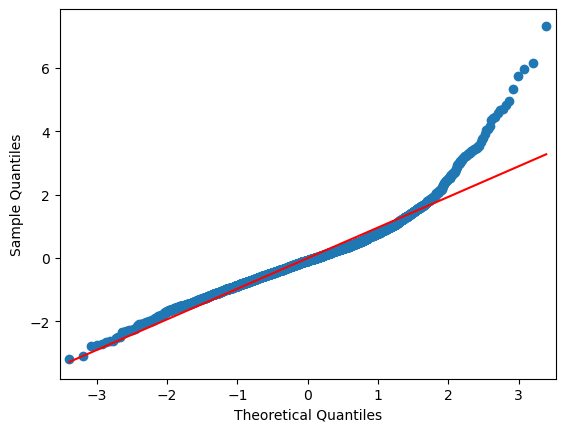

In [98]:
qqplot(model.resid_pearson, line='r');

# binary classification of 0 or not

In [114]:
data_w_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   URN                             2972 non-null   int64  
 1   not_sustained_rate              2972 non-null   float64
 2   not_sustained_rate_overalldest  2972 non-null   float64
 3   total_absence                   2972 non-null   float64
 4   persistent_absence              2972 non-null   float64
 5   urban_rural                     2972 non-null   object 
 6   denomination                    2972 non-null   object 
 7   FSM                             2972 non-null   float64
 8   White_British                   2972 non-null   float64
 9   EAL                             2972 non-null   float64
 10  perc_boys                       2972 non-null   float64
 11  region_name                     2972 non-null   object 
 12  school_name                     2972 no

In [138]:
data_w_0['zero_rate'] = data_w_0['not_sustained_rate'].apply(lambda x: 1 if x == 0 else 0)

In [139]:
data_w_0['zero_rate'].head(10)

1     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
Name: zero_rate, dtype: int64

In [140]:
data_w_0.groupby('zero_rate').size()

zero_rate
0    2877
1      95
dtype: int64

In [141]:
data_w_0['single_sex_binary'] = data_w_0['school_sex']

In [142]:
data_w_0['single_sex_binary'].replace('Girls', 1, inplace=True)
data_w_0['single_sex_binary'].replace('Boys', 1, inplace=True)
data_w_0['single_sex_binary'].replace('Mixed', 0, inplace=True)

In [162]:
data_w_0['Ofsted_rating'] = data_w_0['Ofsted_rating'].astype(str)
np.unique(data['Ofsted_rating'])

array(['Good', 'Outstanding', 'Requires improvement',
       'Serious Weaknesses', 'Special Measures'], dtype=object)

In [161]:
data_w_0['Ofsted_rating'].replace('Serious Weaknesses', 'Inadequate', inplace=True)
data_w_0['Ofsted_rating'].replace('Special Measures', 'Inadequate', inplace=True)

In [145]:
ofsted_cats = CategoricalDtype(categories=['Outstanding', 'Good', 'Requires improvement', 'Inadequate'], ordered=True)
data_w_0['Ofsted_rating'] = data_w_0['Ofsted_rating'].astype(ofsted_cats)

In [163]:
data_w_0.groupby('Ofsted_rating').size()

Ofsted_rating
Good                    2077
Inadequate                71
Outstanding              450
Requires improvement     374
dtype: int64

In [146]:
data_w_0['denomination'].replace('Church of England', 'Christian', inplace=True)
data_w_0['denomination'].replace('Hindu', 'Other faith', inplace=True)
data_w_0['denomination'].replace('Jewish', 'Other faith', inplace=True)
data_w_0['denomination'].replace('Multi-faith', 'No faith', inplace=True)
data_w_0['denomination'].replace('Muslim', 'Other faith', inplace=True)
data_w_0['denomination'].replace('No religious character', 'No faith', inplace=True)
data_w_0['denomination'].replace('Other Anglican Faith', 'Christian', inplace=True)
data_w_0['denomination'].replace('Other Christian Faith', 'Christian', inplace=True)
data_w_0['denomination'].replace('Roman Catholic', 'Christian', inplace=True)
data_w_0['denomination'].replace('Sikh', 'Other faith', inplace=True)

In [147]:
data_w_0.groupby('denomination').size()

denomination
Christian       515
No faith       2425
Other faith      32
dtype: int64

In [148]:
data_w_0['faith_binary'] = data_w_0['denomination']

In [149]:
data_w_0['faith_binary'].replace('No faith', 0, inplace=True)
data_w_0['faith_binary'].replace('Christian', 1, inplace=True)
data_w_0['faith_binary'].replace('Other faith', 1, inplace=True)

In [150]:
data_w_0.groupby('faith_binary').size()

faith_binary
0    2425
1     547
dtype: int64

In [151]:
data_w_0['urban_rural'] = data_w_0['urban_rural'].astype(str)
np.unique(data_w_0['urban_rural'])

array(['Rural hamlet and isolated dwellings',
       'Rural hamlet and isolated dwellings in a sparse setting',
       'Rural town and fringe',
       'Rural town and fringe in a sparse setting', 'Rural village',
       'Rural village in a sparse setting', 'Urban city and town',
       'Urban city and town in a sparse setting',
       'Urban major conurbation', 'Urban minor conurbation'], dtype=object)

In [152]:
data_w_0['urban_rural'].replace('(England/Wales) Urban major conurbation', 'Urban major conurbation', inplace=True)
data_w_0['urban_rural'].replace('(England/Wales) Urban minor conurbation', 'Urban minor conurbation', inplace=True)
data_w_0['urban_rural'].replace('(England/Wales) Urban city and town', 'Urban city and town', inplace=True)
data_w_0['urban_rural'].replace('(England/Wales) Urban city and town in a sparse setting', 'Urban city and town in a sparse setting', inplace=True)
data_w_0['urban_rural'].replace('(England/Wales) Rural town and fringe', 'Rural town and fringe', inplace=True)
data_w_0['urban_rural'].replace('(England/Wales) Rural town and fringe in a sparse setting', 'Rural town and fringe in a sparse setting', inplace=True)
data_w_0['urban_rural'].replace('(England/Wales) Rural village', 'Rural village', inplace=True)
data_w_0['urban_rural'].replace('(England/Wales) Rural village in a sparse setting', 'Rural village in a sparse setting', inplace=True)
data_w_0['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings', 'Rural hamlet and isolated dwellings', inplace=True)
data_w_0['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings in a sparse setting', 'Rural hamlet and isolated dwellings in a sparse setting', inplace=True)

In [153]:
urban_rural_cats = CategoricalDtype(categories=['Urban major conurbation', 
                                                'Urban minor conurbation', 
                                                'Urban city and town', 
                                                'Urban city and town in a sparse setting', 
                                                'Rural town and fringe',
                                                'Rural town and fringe in a sparse setting',
                                                'Rural village',
                                                'Rural village in a sparse setting',
                                                'Rural hamlet and isolated dwellings',
                                                'Rural hamlet and isolated dwellings in a sparse setting'
                                               ], 
                                    ordered=True)
data_w_0['urban_rural'] = data_w_0['urban_rural'].astype(urban_rural_cats)

In [154]:
# new column for binary urban status
data_w_0['urban_binary'] = data_w_0['urban_rural']

In [155]:
# replace labels with numbers
data_w_0['urban_binary'].replace('Urban major conurbation', 1, inplace=True)
data_w_0['urban_binary'].replace('Urban minor conurbation', 1, inplace=True)
data_w_0['urban_binary'].replace('Urban city and town', 1, inplace=True)
data_w_0['urban_binary'].replace('Urban city and town in a sparse setting', 1, inplace=True)
data_w_0['urban_binary'].replace('Rural town and fringe', 0, inplace=True)
data_w_0['urban_binary'].replace('Rural town and fringe in a sparse setting', 0, inplace=True)
data_w_0['urban_binary'].replace('Rural village', 0, inplace=True)
data_w_0['urban_binary'].replace('Rural village in a sparse setting', 0, inplace=True)
data_w_0['urban_binary'].replace('Rural hamlet and isolated dwellings', 0, inplace=True)
data_w_0['urban_binary'].replace('Rural hamlet and isolated dwellings in a sparse setting', 0, inplace=True)

In [156]:
data_w_0['Ofsted_num'] = data['Ofsted_rating']
data_w_0['Ofsted_num'].replace('Outstanding', 4, inplace=True)
data_w_0['Ofsted_num'].replace('Good', 3, inplace=True)
data_w_0['Ofsted_num'].replace('Requires improvement', 2, inplace=True)
data_w_0['Ofsted_num'].replace('Inadequate', 1, inplace=True)

In [165]:
vars_for_corr = data_w_0[['zero_rate', 'not_sustained_rate', 'not_sustained_rate_overalldest',
                      'absence_rate_non_excl', 'persistent_absence', 
                      'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                      'FSM', 'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 
                      'headcount', 'KS4_headcount', 
                      'pupil_teacher_ratio', 'assistant_teacher_ratio', 
                      
                      'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8', 
                      'selective', 'post16',
                      'IMD', 'urban_binary', 'single_sex_binary', 'faith_binary']]

In [166]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

##### Positive correlations

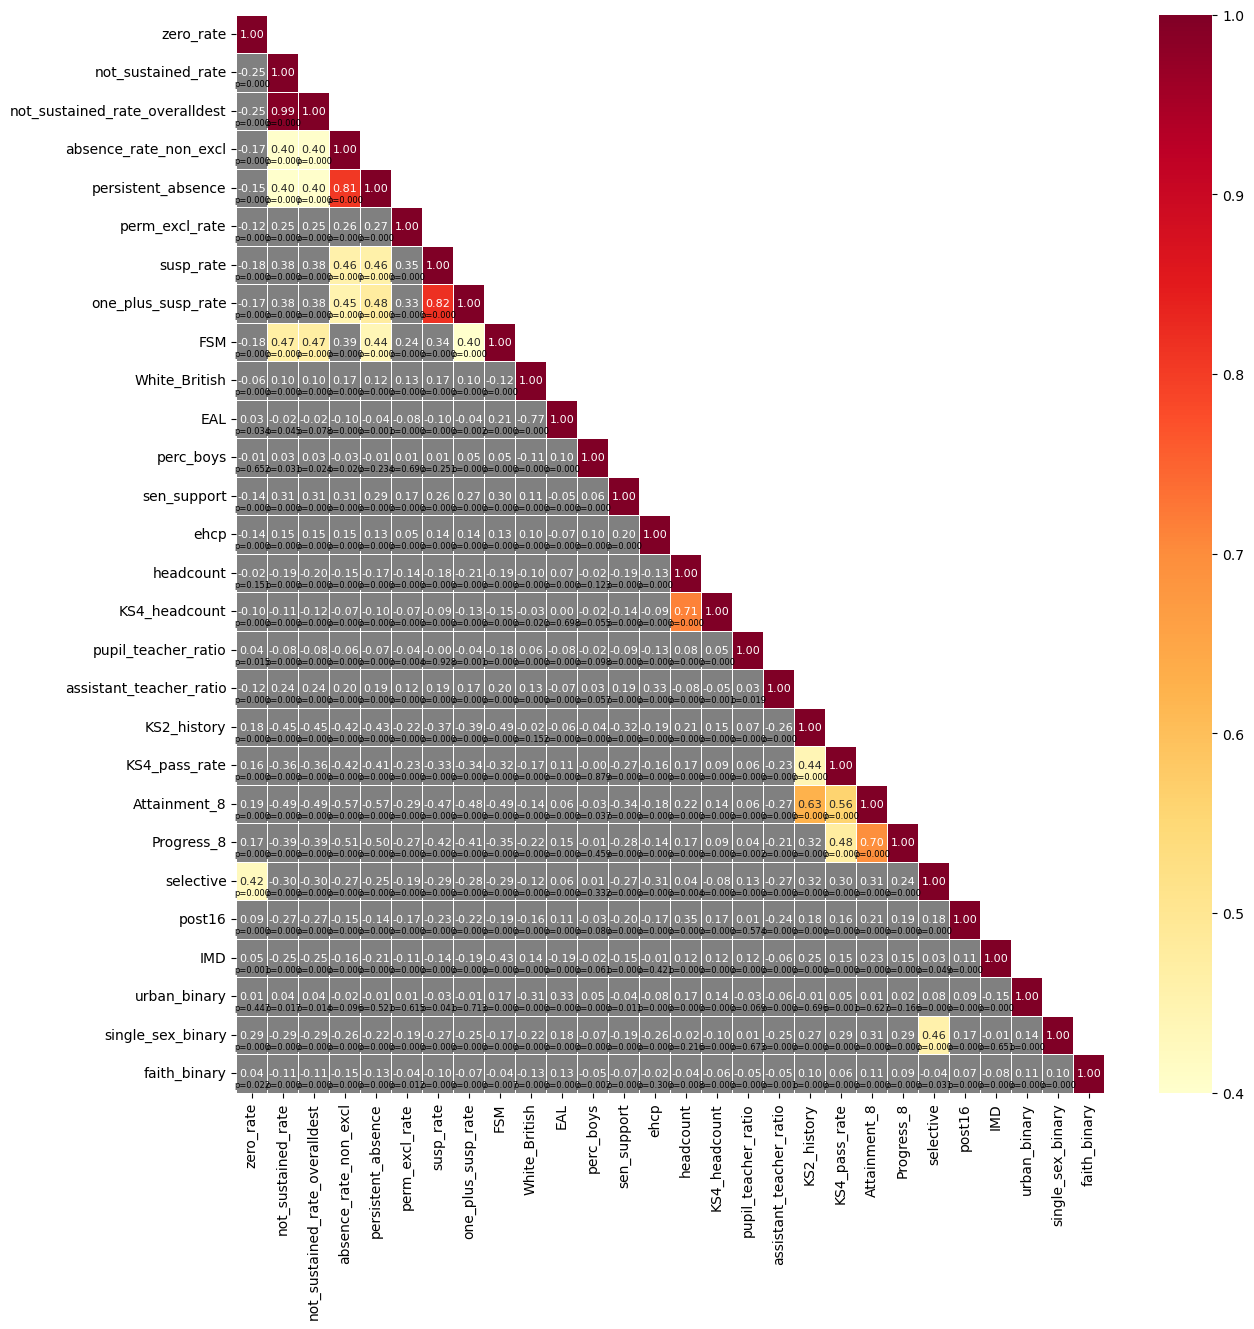

In [167]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)
